In [18]:
#Importing libraries
import numpy as nmpy
import matplotlib.pyplot as mplt
import pandas as pnds
import seaborn as sbrn 
import sklearn

#add cleaned set
ds =  pnds.read_csv("bike_buyers_clean.csv")

In [19]:
from sklearn import preprocessing #imported library for encoding

l_e = preprocessing.LabelEncoder() #for each different variable encoded(tranformation to get all varaibles in the same data type)

ds['Marital Status'] = l_e.fit_transform(ds['Marital Status']) #same process for each variable except int values
ds['Gender'] = l_e.fit_transform(ds['Gender'])
ds['Education'] = l_e.fit_transform(ds['Education'])
ds['Occupation'] = l_e.fit_transform(ds['Occupation'])
ds['Home Owner'] = l_e.fit_transform(ds['Home Owner'])
ds['Commute Distance'] = l_e.fit_transform(ds['Commute Distance'])
ds['Region'] = l_e.fit_transform(ds['Region'])
ds['Purchased Bike'] = l_e.fit_transform(ds['Purchased Bike'])

#print transformed values
ds.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


In [20]:
X = ds.drop(['Purchased Bike'], axis=1)#independent variable(all values except "purchased bike")
y = ds['Purchased Bike'] #the dependent variable (purchased bike or not= 0 or 1)

In [21]:
from sklearn.model_selection import train_test_split #imported for data decomposition

#separates data at random into two parts, test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state = 0) 
#test sample= 200 test set, training sample= 800 training set
X_train.shape, X_test.shape #displays sets

((800, 12), (200, 12))

In [22]:
y_train #since it is a traing set it shows 800 values about if bike purchased or not (0 or 1)

687    0
500    0
332    1
979    0
817    1
      ..
835    1
192    0
629    0
559    0
684    0
Name: Purchased Bike, Length: 800, dtype: int32

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creating Classifier (C) for Decision Tree
C = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

# Train Decision Tree Classifer
C = C.fit(X_train,y_train)

#We made predictions with the model we created using our separated x test set (X_test),
# and compared the set (y_pred) with our target variable (y_test) test set.
y_prediction = C.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

#calculate and display model-accuracy score
mas = accuracy_score(y_test,y_prediction)
print('Accuracy score of the Model is  {0:0.4f}'.format(mas))

Accuracy score of the Model is  0.5650


In [25]:
y_prediction_train2 = C.predict(X_train)
act =accuracy_score(y_train, y_prediction_train2)
print('Accuracy Score of TrainingSet {0:0.4f}'. format(act))

Accuracy Score of TrainingSet 0.6625


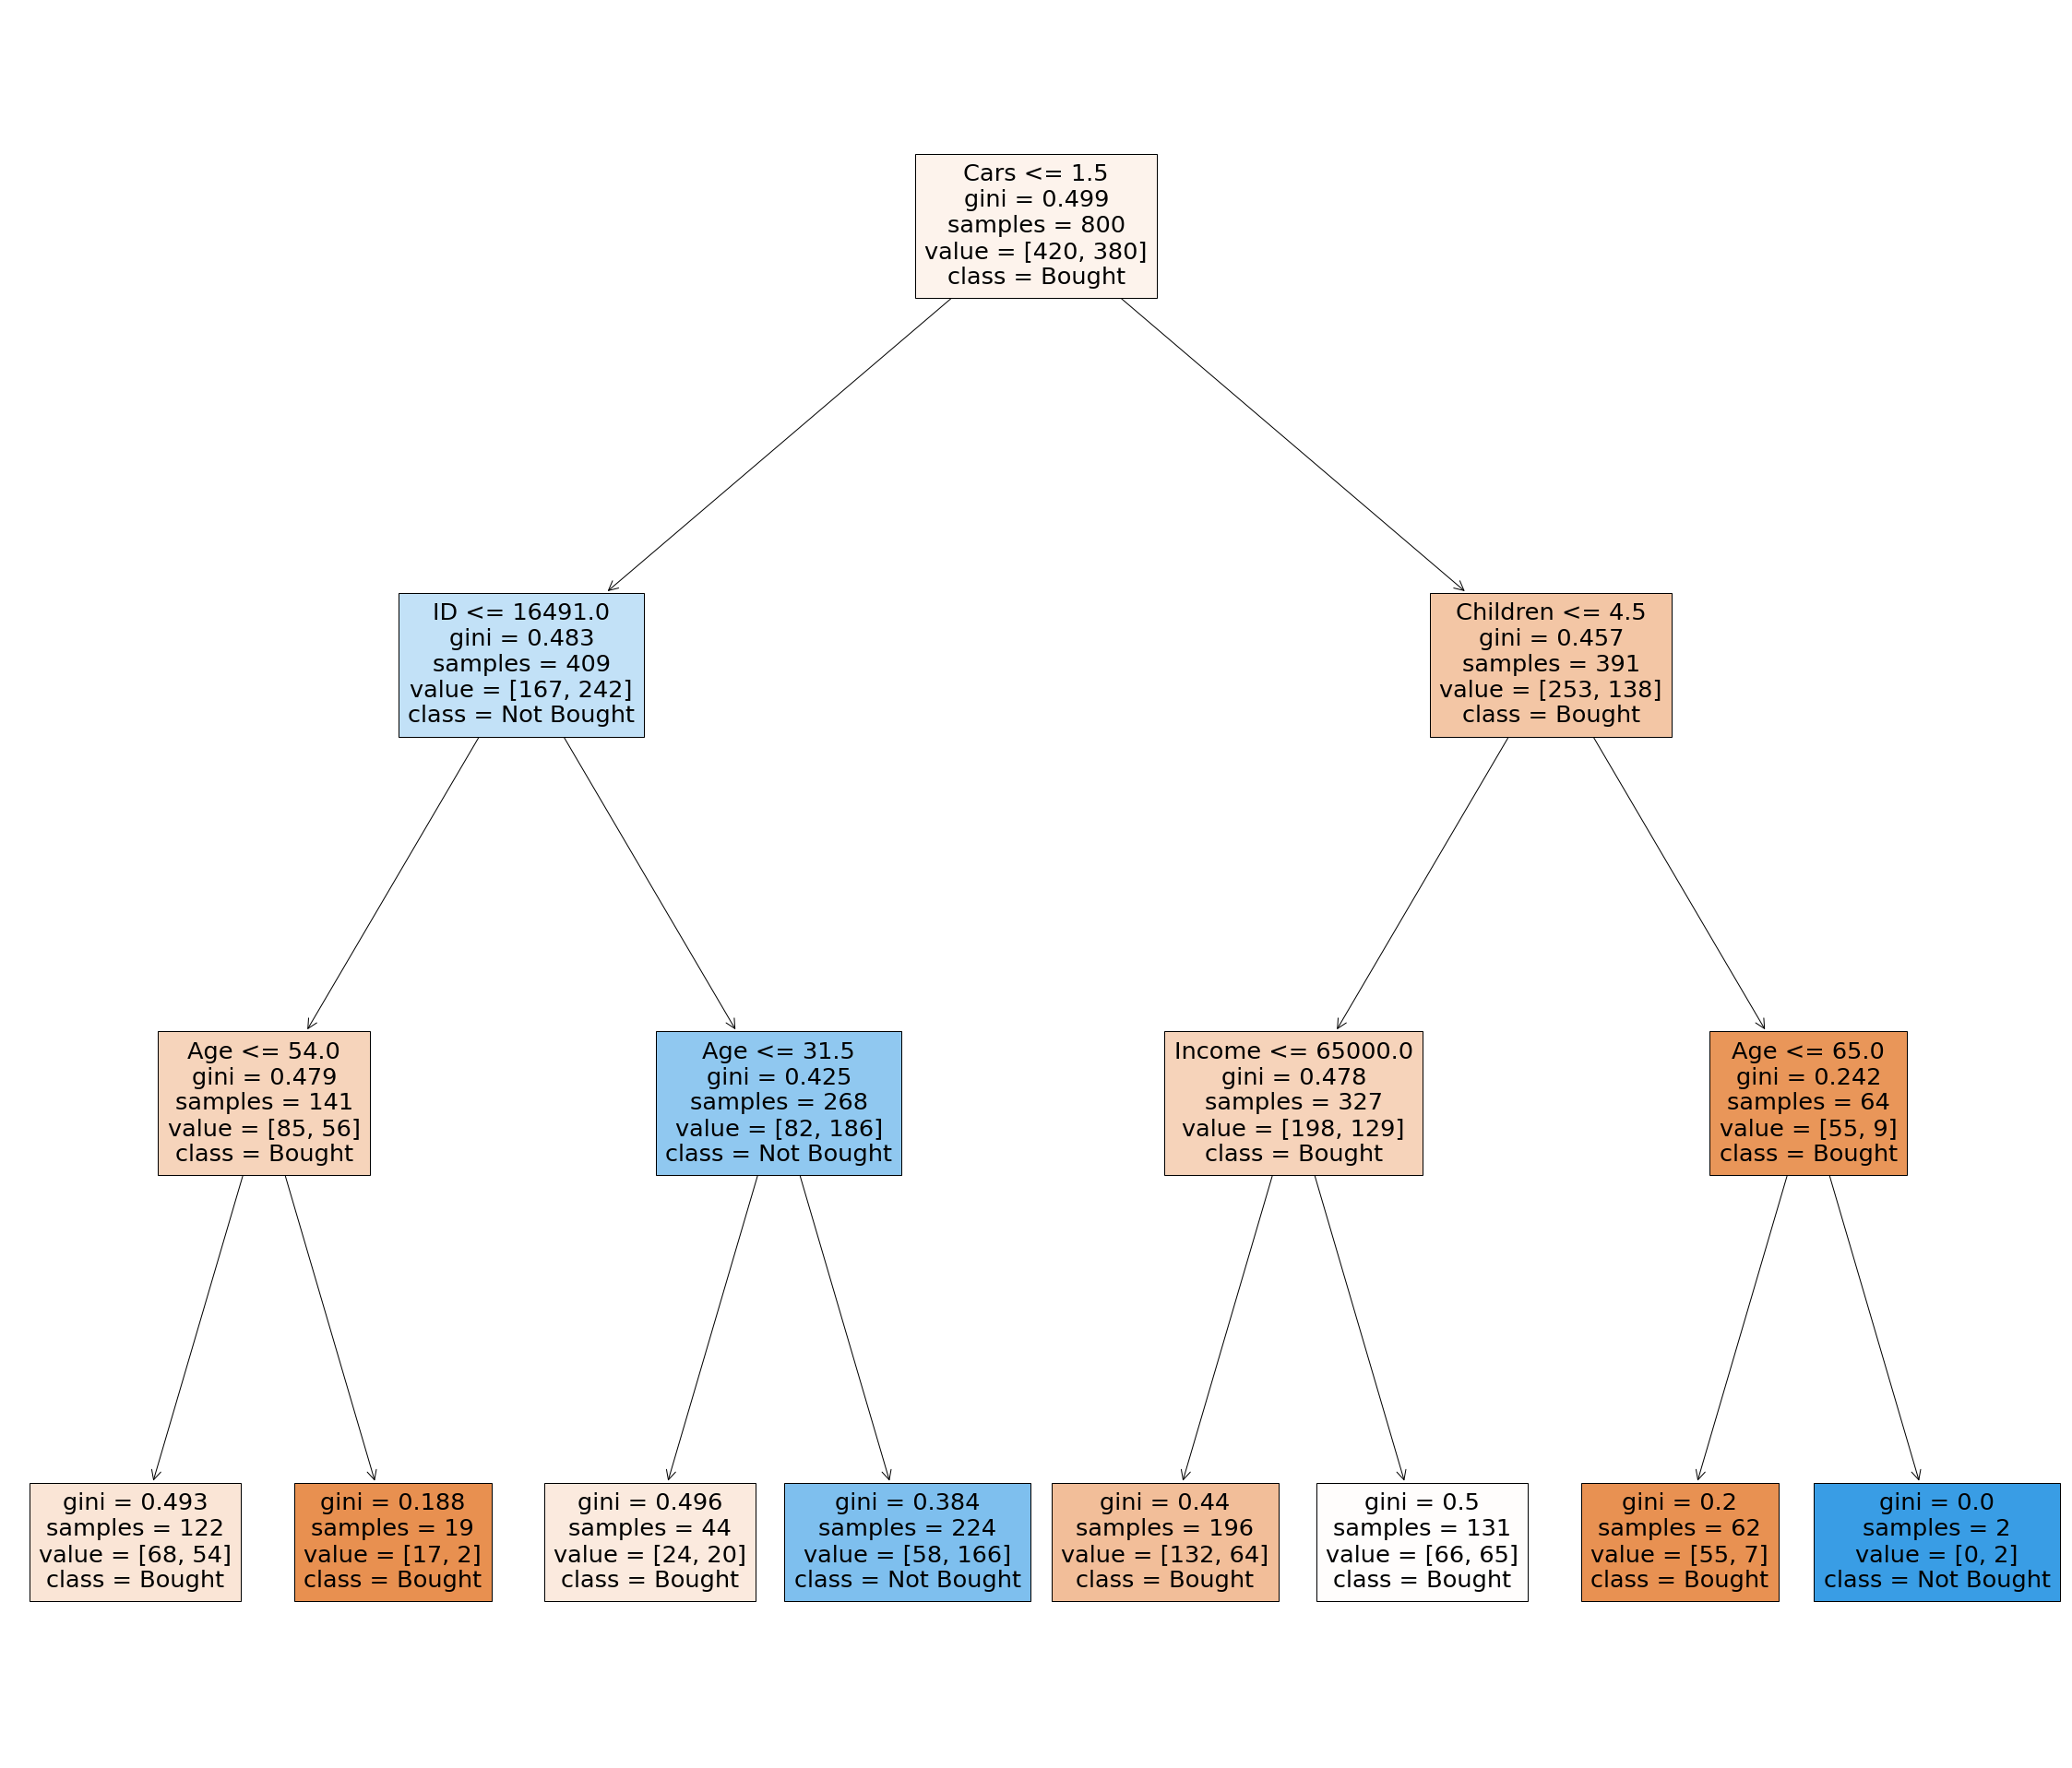

In [26]:
#Now we are visualiazing our decision tree
from sklearn import tree

features=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
B=['Bought', 'Not Bought']

figure = mplt.figure(figsize=(40,35))
_ = tree.plot_tree(C, feature_names = features, 
               class_names=B, filled=True)


In [27]:
# By using grid_search,we are improving accuracy

from sklearn.model_selection import GridSearchCV
C = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_classifier_acc = GridSearchCV(C, param_grid = grid_values)
grid_classifier_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [28]:
from sklearn.metrics import confusion_matrix
y_prediction_acc = grid_classifier_acc.predict(X_test)

# New metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_prediction_acc)))

#Confusion matrix
conf_mat = confusion_matrix(y_test,y_prediction_acc)
print(conf_mat)

Accuracy Score : 0.6
[[62 37]
 [43 58]]


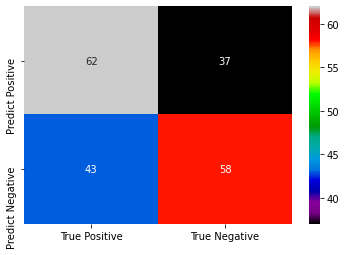

In [29]:
#create visualization object for confusion matrix
visual_matrix = pnds.DataFrame(data=conf_mat, columns=['True Positive', 'True Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sbrn.heatmap(visual_matrix, annot=True, fmt='d', cmap='nipy_spectral') #visualization setting 
mplt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.54      0.77      0.64        99
           1       0.62      0.37      0.46       101

    accuracy                           0.56       200
   macro avg       0.58      0.57      0.55       200
weighted avg       0.58      0.56      0.55       200

